In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import torch
from heterogeneity_gym import rectangle
import matplotlib.pyplot as plt
import numpy as np

**Create structures and images from uniform latent dimensions.**

In [ ]:
n_images_to_create = 3
#noise_std = 0.5
N_raw = 10
N_clean = 10

noise_std_list = torch.tensor([0.1 * (i+1) for i in range(N_raw)]) * 1000

#noise_std_list = 0.5
print("Noise std list:", noise_std_list)

rectangle_model = rectangle.RectangleModel(noise_std=noise_std_list)
raw_images, structures, latent_samples = rectangle_model.sample_images(N_raw)
clean_images, structures = rectangle_model.render_images_from_latent(latent_samples[:N_clean], noise_std=0)

# latent_model = rectangle.Latent2DGaussianMixture()
snr = [torch.var(clean_images) / noise_std**2 for noise_std in noise_std_list] 
print("Observed Signal to noise ratio:", snr)

Pij = rectangle_model.evaluate_pij_matrix(raw_images, clean_images, noise_std_list)
print("P", Pij) 

Noise std list: tensor([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900., 1000.])
Observed Signal to noise ratio: [tensor(8.6845e-07), tensor(2.1711e-07), tensor(9.6494e-08), tensor(5.4278e-08), tensor(3.4738e-08), tensor(2.4124e-08), tensor(1.7723e-08), tensor(1.3570e-08), tensor(1.0722e-08), tensor(8.6845e-09)]
experimental_images shape: torch.Size([10, 1, 128, 128])
simulated_images shape: torch.Size([1, 10, 128, 128])
difference before subtracting mean tensor([[1.6241e+08, 1.6241e+08, 1.6240e+08, 1.6241e+08, 1.6240e+08, 1.6241e+08,
         1.6240e+08, 1.6241e+08, 1.6241e+08, 1.6240e+08],
        [6.4186e+08, 6.4186e+08, 6.4187e+08, 6.4186e+08, 6.4187e+08, 6.4186e+08,
         6.4186e+08, 6.4187e+08, 6.4186e+08, 6.4187e+08],
        [1.4778e+09, 1.4778e+09, 1.4778e+09, 1.4778e+09, 1.4778e+09, 1.4778e+09,
         1.4778e+09, 1.4778e+09, 1.4778e+09, 1.4778e+09],
        [2.5908e+09, 2.5908e+09, 2.5908e+09, 2.5908e+09, 2.5908e+09, 2.5908e+09,
         2.5908e+09, 2.5908e

RuntimeError: Numpy is not available

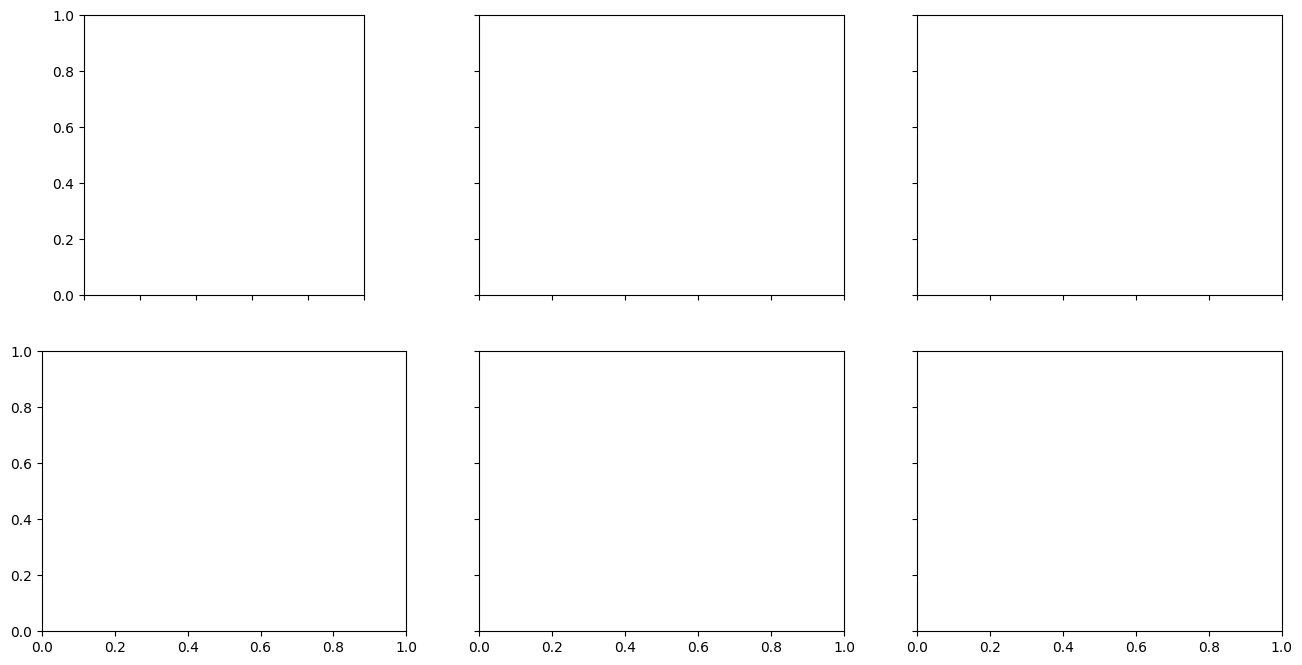

In [16]:
fig, axes = plt.subplots(2, n_images_to_create, sharex=True, sharey=True, figsize=(16, 8))

for i, ax in enumerate(axes[0]):
    ax.imshow(raw_images[i], cmap='gray')
for i, ax in enumerate(axes[1]):
    ax.imshow(clean_images[i], cmap='gray')

In [12]:
# Calculate log likelihoods
log_Pij = rectangle_model.evaluate_log_pij_matrix(raw_images, clean_images, noise_std)
print(log_Pij / 128**2)

NameError: name 'noise_std' is not defined

**Create images from a Gaussian mixture latent dimension model.**

Text(0, 0.5, 'Width')

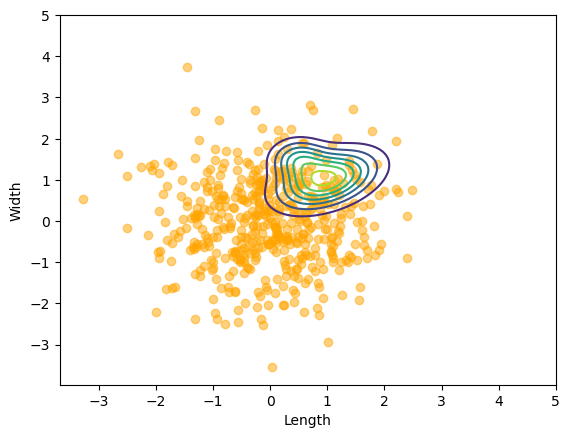

In [ ]:

# Plot latent densities along with samples
mesh_size = 100
lengths = torch.linspace(-1, 5, mesh_size)
widths = torch.linspace(-1, 5, mesh_size)
l_grid, w_grid = torch.meshgrid(lengths, widths)

# Compute probability density
lw_grid = torch.cat((l_grid.reshape(-1, 1), w_grid.reshape(-1, 1)), dim=1)
probabilities = torch.tensor([rectangle_model.latent_density.evaluate_density(length_width) for length_width in lw_grid]).reshape(mesh_size, mesh_size)

# Generate samples from mixture model
num_samples = 500
lw_samples = latent_model.sample(num_samples)

plt.contour(l_grid.numpy(), w_grid.numpy(), probabilities.numpy())
plt.scatter(lw_samples[:, 0], lw_samples[:, 1], color='orange', alpha=0.5)
plt.xlabel("Length"); plt.ylabel("Width")

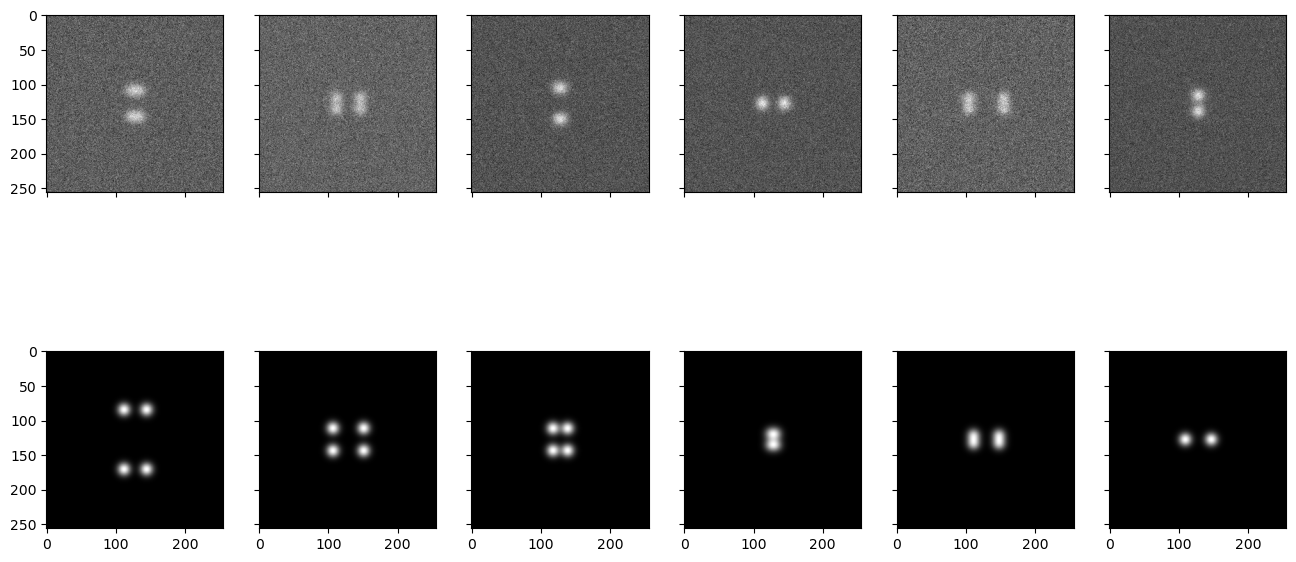

In [ ]:
# Initialize rectangle models with and without noise.
noise_std = 0.25
image_width = 256
rectangle_model_with_noise = rectangle.RectangleModel(latent_density=latent_model, image_width_in_pixels=image_width, noise_std=noise_std)
rectangle_model_without_noise = rectangle.RectangleModel(latent_density=latent_model, image_width_in_pixels=image_width)

# Sample images from above models.
num_structures = 6
images_with_noise, structures, latents = rectangle_model_with_noise.sample_images(num_structures)
images_without_noise, structures, latents = rectangle_model_without_noise.sample_images(num_structures)

# Plot noisy and noiseless images from same latent distribution of lengths and widths.
fig, axes = plt.subplots(nrows=2, ncols=num_structures, sharex=True, sharey=True, figsize=(16, 8))

for i, ax in enumerate(axes[0]):
    ax.imshow(images_with_noise[i], cmap='gray')
for i, ax in enumerate(axes[1]):
    ax.imshow(images_without_noise[i], cmap='gray')